In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [10]:
subway_lines = gpd.read_file("./Datasets/subte_lineas.geojson")
subway_stations = gpd.read_file("./Datasets/subte_estaciones.geojson")
neighborhoods = gpd.read_file("./Datasets/barrios.geojson")

subway_colors = {"A":"cyan", "B":"red", "C":"blue", "D":"green", "E":"purple", "H":"gold"}

## We pick by hand the existing subway lines from the years 2010 and 2001 (i.e., the ones for which we have census data)

### First we do it for 2010:

In [7]:
Aline_2010 = subway_stations[(subway_stations["LINEA"]=="A") & (subway_stations["ID"].isin([31,32,33,34,35,36,37,38,39,40,41,42,43,70,75,76]))]
Bline_2010 = subway_stations[(subway_stations["LINEA"]=="B") & (subway_stations["ID"].isin([20,21,22,23,24,25,26,27,28,29,30,66,72,73,74]))]
Cline_2010 = subway_stations[subway_stations["LINEA"]=="C"]
Dline_2010 = subway_stations[subway_stations["LINEA"]=="D"]
Eline_2010 = subway_stations[(subway_stations["LINEA"]=="E") & (subway_stations["ID"].isin(range(44,70)))]
Hline_2010 = subway_stations[(subway_stations["LINEA"]=="H") & (subway_stations["ID"].isin([1,2,3,4,5,77,]))]

In [13]:
lines_2010 = subway_lines[subway_lines["ID"].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63, 64, 65, 66,67,68,69,70, 71])]
course_by_line_2010 = {line : lines_2010[lines_2010["LINEASUB"]=="LINEA "+line] for line in ["A","B","C","D","E","H"]}
stations_by_line_2010 = {"A" : Aline_2010, "B" : Bline_2010, "C" : Cline_2010, "D" : Dline_2010, "E" : Eline_2010, "H" : Hline_2010}

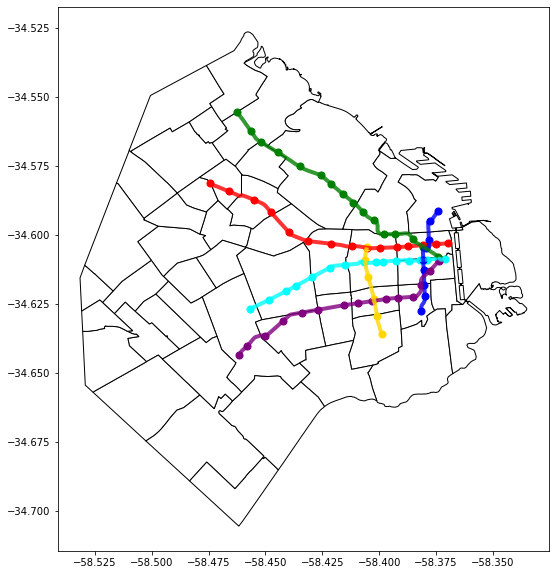

In [15]:
# Simple plot to confirm that we're on the right path
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10,10))
neighborhoods.plot(ax=gax, color="white", edgecolor="black")

for line in ["A","B","C","D","E","H"]:
    stations_by_line_2010[line].plot(ax=gax, color=subway_colors[line], alpha=1, markersize=50)
    course_by_line_2010[line].plot(ax=gax, color=subway_colors[line], alpha=0.8, linewidth=4)


### Now we do it for 2001

In [17]:
Aline_2001 = subway_stations[(subway_stations["LINEA"]=="A") & (subway_stations["ID"].isin([31,32,33,34,35,36,37,38,39,40,41,42,43,70]))]
Bline_2001 = subway_stations[(subway_stations["LINEA"]=="B") & (subway_stations["ID"].isin([20,21,22,23,24,25,26,27,28,29,30,66,72]))]
Cline_2001 = subway_stations[subway_stations["LINEA"]=="C"]
Dline_2001 = subway_stations[subway_stations["LINEA"]=="D"]
Eline_2001 = subway_stations[(subway_stations["LINEA"]=="E") & (subway_stations["ID"].isin(range(44,70)))]
# H line did not exist in 2001!

In [18]:
lines_2001 = subway_lines[subway_lines["ID"].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62])]
course_by_line_2001 = {line : lines_2001[lines_2001["LINEASUB"]=="LINEA "+line] for line in ["A","B","C","D","E"]}
stations_by_line_2001 = {"A" : Aline_2001, "B" : Bline_2001, "C" : Cline_2001, "D" : Dline_2001, "E" : Eline_2001}

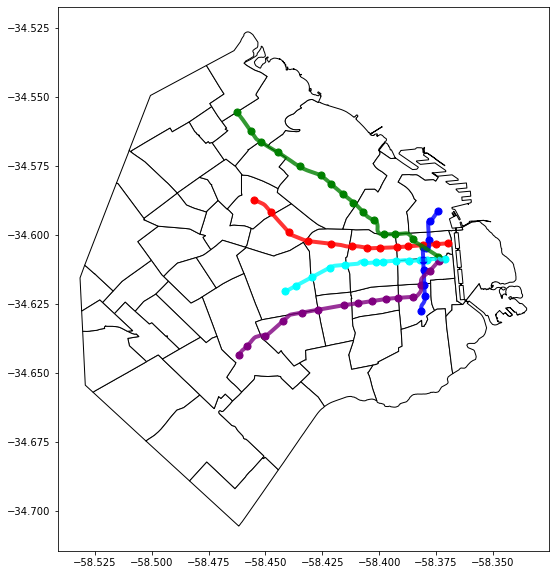

In [19]:
# Simple plot to confirm that we're on the right path
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10,10))
neighborhoods.plot(ax=gax, color="white", edgecolor="black")

for line in ["A","B","C","D","E"]: # No H line in 2001
    stations_by_line_2001[line].plot(ax=gax, color=subway_colors[line], alpha=1, markersize=50)
    course_by_line_2001[line].plot(ax=gax, color=subway_colors[line], alpha=0.8, linewidth=4)

In [22]:
# Saving our clean data into GeoJSON
subway_stations_2010 = pd.concat([Aline_2010, Bline_2010, Cline_2010, Dline_2010, Eline_2010, Hline_2010])
subway_stations_2010.to_file("./Datasets/subte_estaciones2010.geojson", driver="GeoJSON")
lines_2010.to_file("./Datasets/subte_lineas2010.geojson", driver="GeoJSON")

subway_stations_2001 = pd.concat([Aline_2001, Bline_2001, Cline_2001, Dline_2001, Eline_2001])
subway_stations_2001.to_file("./Datasets/subte_estaciones2001.geojson", driver="GeoJSON")
lines_2001.to_file("./Datasets/subte_lineas2001.geojson", driver="GeoJSON")